In [ ]:
!pip install wget
!pip install librosa

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7bf644c57a3cd14bb62166702c22561c3e16dff82ef458eaa206e4c0bc6f1e1b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
import os
import shutil
import librosa
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.callbacks import EarlyStopping

In [ ]:
!mkdir /content/VoiceDetection

In [ ]:

print('Beginning file download with wget module')
url = 'https://www.openslr.org/resources/12/dev-clean.tar.gz'
wget.download(url, '/content/VoiceDetection/dev-clean.tar.gz')


Beginning file download with wget module


'/content/VoiceDetection/dev-clean.tar.gz'

In [ ]:
!sudo tar -xvf /content/VoiceDetection/dev-clean.tar.gz -C /content/VoiceDetection/

LibriSpeech/LICENSE.TXT
LibriSpeech/README.TXT
LibriSpeech/CHAPTERS.TXT
LibriSpeech/SPEAKERS.TXT
LibriSpeech/BOOKS.TXT
LibriSpeech/dev-clean/
LibriSpeech/dev-clean/2277/
LibriSpeech/dev-clean/2277/149896/
LibriSpeech/dev-clean/2277/149896/2277-149896-0026.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0005.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0033.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0006.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0018.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0034.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0021.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0015.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0012.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0027.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0007.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0030.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0011.flac
LibriSpeech/dev-clean/2277/149896/2277-149896-0009.flac
LibriSpeech

In [ ]:
dataDir = "/content/VoiceDetection/LibriSpeech/dev-clean/"
folders = os.listdir(dataDir)
print(folders)
for x in folders:
  subfolders = os.listdir(dataDir + x)
  for y in subfolders:
    files = os.listdir(dataDir + x + "/" + y)
    for z in files:
      shutil.move(dataDir + x + "/" + y + "/" + z, dataDir + x + "/" + z)
  for y in subfolders:
    shutil.rmtree(dataDir + x + "/" + y)

['1993', '251', '2277', '2803', '5536', '1462', '652', '3081', '7976', '6295', '3170', '3853', '3576', '2412', '5895', '6241', '7850', '1272', '5338', '6345', '6319', '3536', '422', '2035', '777', '8297', '1919', '5694', '1988', '2902', '2086', '2078', '8842', '2428', '3000', '3752', '84', '1673', '174', '6313']


In [ ]:
folders = os.listdir("/content/VoiceDetection/LibriSpeech/dev-clean/")
for x in folders:
  if x == '1462' or x == '1673' or x == '174':
    pass
  else:
    shutil.rmtree("/content/VoiceDetection/LibriSpeech/dev-clean/" + x)

In [ ]:

# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(file):
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath(file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    # label = files.label

    return mfccs, chroma, mel, contrast, tonnetz

In [ ]:
dataDir = "/content/VoiceDetection/LibriSpeech/dev-clean/"
features = []
mappedName = {}
counter = 0
files = os.listdir(dataDir)
totalFolders = len(files)
processCount = 0
for x in files:
  subfolders = os.listdir(dataDir + x)
  counter = counter + 1
  mappedName[(str(counter))] = x
  processCount = processCount + 1
  for y in subfolders:
    if y.endswith(".flac"):

      print("%d/%d => Extracting features for Speech: %s" % (totalFolders, processCount, x + "/" + y) )
      feature = extract_features(dataDir + x + "/" + y)
      merged_feature = np.concatenate((feature[0], feature[1], feature[2], feature[3], feature[4]))
      features.append((merged_feature, str(counter)))

print(mappedName)



40/1 => Extracting features for Speech: 1993/1993-147149-0001.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0011.flac
40/1 => Extracting features for Speech: 1993/1993-147965-0002.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0018.flac
40/1 => Extracting features for Speech: 1993/1993-147964-0005.flac
40/1 => Extracting features for Speech: 1993/1993-147965-0005.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0029.flac
40/1 => Extracting features for Speech: 1993/1993-147965-0006.flac
40/1 => Extracting features for Speech: 1993/1993-147966-0001.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0004.flac
40/1 => Extracting features for Speech: 1993/1993-147964-0006.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0002.flac
40/1 => Extracting features for Speech: 1993/1993-147965-0001.flac
40/1 => Extracting features for Speech: 1993/1993-147966-0000.flac
40/1 => Extracting features for Speech: 1993/1993-147149-0017.

In [ ]:
print("Total Number of Unique Person in Dataset: ", len(mappedName))

Total Number of Unique Person in Dataset:  40


In [ ]:
random.shuffle(features)
total = len(features)
train_len = int(total * 80 / 100)
test_len = total - train_len
print("Total samples: ", total)
print("Train samples: ", train_len)
print("Test samples: ", test_len)
X_train = []
y_train = []
X_val = []

y_val = []
for x in features[0:train_len]:
  X_train.append(x[0])
  y_train.append(x[1])

for x in features[train_len:total]:
  X_val.append(x[0])
  y_val.append(x[1])


X_train = np.array(X_train).astype("float32")
y_train = np.array(y_train).astype("float32")
X_val = np.array(X_val).astype("float32")
y_val = np.array(y_val).astype("float32")


y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)
y_val = tf.keras.utils.to_categorical(
    y_val, dtype='float32'
)

print('Shape: y_train', y_train.shape)
print(y_train)

print('Shape: y_val', y_val.shape)
print(y_val)

print(X_train.shape)

print(X_val.shape)
print(y_val.shape)


# history = model.fit(X_train, y_train, batch_size=256, epochs=100, 
#                     validation_data=(X_val, y_val),
#                     callbacks=[early_stop])



Total samples:  2703
Train samples:  2162
Test samples:  541
Shape: y_train (2162, 41)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: y_val (541, 41)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2162, 193)
(541, 193)
(541, 41)


In [ ]:



outputLayerLength = len(mappedName) + 1

# Define the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(193, input_shape=(193,), activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(outputLayerLength, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

history = model.fit(X_train, y_train, batch_size=80, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 193)               37442     
_________________________________________________________________
dense_8 (Dense)              (None, 512)               99328     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

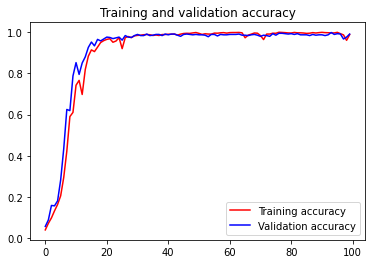

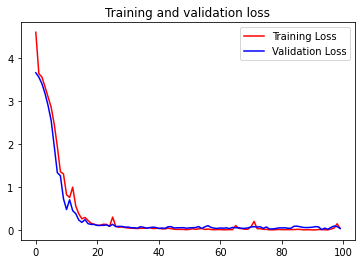

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

X_test = []
for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  print('Here file Path: ', path)
  feature = extract_features(path)
  merged_feature = np.concatenate((feature[0], feature[1], feature[2], feature[3], feature[4]))
  X_test.append(np.array(merged_feature).astype('float32'))

X_test = np.array(X_test)
print(X_test.shape)
classes = model.predict(X_test)
print(classes)
print(mappedName)

for x in classes:
  maxx = 0
  cnt = 0
  ans = -1
  for y in x:
    if y > maxx:
      maxx = y
      ans = cnt
    cnt = cnt + 1
    
  
  print("maxProbabilty = ", maxx)
  print("Class: ", mappedName[str(ans)])

# preds = model.predict_classes(X_test)

Saving 174-50561-0015.flac to 174-50561-0015 (2).flac
Here file Path:  /content/174-50561-0015.flac
(1, 193)
[[6.4766032e-17 9.4174268e-08 1.4612017e-09 3.6039212e-09 2.7582200e-07
  1.1087686e-10 9.2556984e-06 5.4140288e-09 1.0864707e-07 1.0458484e-09
  1.3195735e-07 3.0728233e-09 6.1161232e-09 1.6453232e-08 8.6506738e-08
  7.5538594e-07 2.7787014e-06 9.4457782e-08 1.8441467e-09 5.6411604e-08
  1.9961126e-14 2.4784029e-08 4.7323647e-06 2.0454470e-07 4.8845254e-07
  1.4747315e-08 3.4396597e-09 3.4937266e-09 3.9295511e-08 1.9212130e-06
  7.9299728e-10 9.6092978e-10 9.3412886e-08 6.1003654e-11 3.4126216e-11
  9.8698771e-10 2.9209697e-11 2.6613991e-06 9.3750452e-11 9.9997604e-01
  7.7547239e-12]]
{'1': '1993', '2': '251', '3': '2277', '4': '2803', '5': '5536', '6': '1462', '7': '652', '8': '3081', '9': '7976', '10': '6295', '11': '3170', '12': '3853', '13': '3576', '14': '2412', '15': '5895', '16': '6241', '17': '7850', '18': '1272', '19': '5338', '20': '6345', '21': '6319', '22': '3536',